In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
df = pd.read_csv("file1.csv")

In [ ]:
import seaborn as sns

#EDA

In [ ]:
def add_histogram_values(ax): [ax.bar_label(remove_0_tags_for_histograms(b)) for b in ax.containers]
def remove_0_tags_for_histograms(ax_container):
    ind = np.where(ax_container.datavalues>0)[0]
    ax_container.datavalues = ax_container.datavalues[ind]
    ax_container.patches = [ax_container.patches[i] for i in ind]
    return ax_container

Number of articles per topic:


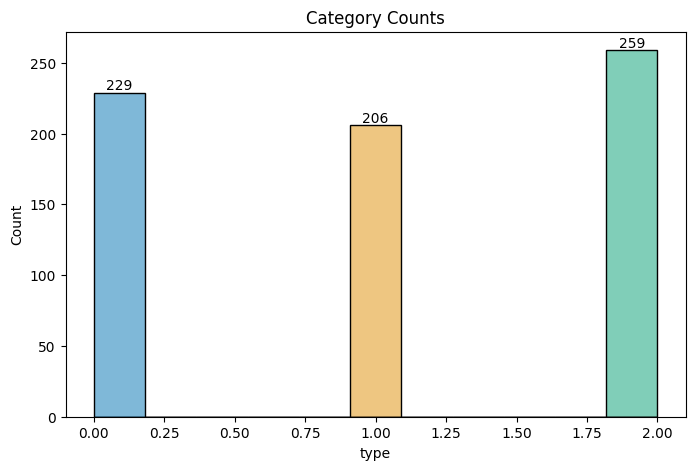

In [ ]:
print('Number of articles per topic:')
fig, ax = plt.subplots(figsize=(8, 5))
ax2 = sns.histplot(
    data = df,
    x = 'type',
    hue = 'type',
    palette = 'colorblind',
    legend = False,
    ).set(
        title = 'Category Counts');
add_histogram_values(ax)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   type     694 non-null    int64 
 1   kalimat  694 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.0+ KB


In [ ]:
pd.DataFrame(df['kalimat'].value_counts())

,kalimat
Ingatan pertama saya adalah melakukan sesuatu.,3
"Jika saya mengajar atau menunjukkan sesuatu yang baru kepada seseorang, saya cenderung memberi mereka penjelasan verbal.",3
Saya mengingat hal-hal terbaik dengan mengatakannya keras-keras atau mengulangi kata-kata dan poin-poin penting di kepala saya,3
"Jika saya harus mengeluh tentang barang yang rusak, saya merasa nyaman untuk mengembalikan barang tersebut ke toko atau mengirimkannya ke kantor pusat",3
Ingatan pertama saya yaitu saat melihat sesuatu.,3
...,...
Saya senang mempelajari tabel dan grafik,1
Kemungkinan besar saya akan merasa terdorong untuk berbagi informasi ini dengan seseorang.Mengungkapkan antusiasme saya terhadap materi pelajaran melalui komunikasi verbal.,1
Duduk di mana saja yang penting saya bisa mendengar tetapi tidak perlu memperhatikan apa yang terjadi di depan,1
Saya memegang benda di tangan saya selama periode belajar.,1


In [ ]:
df2=df

What categories contain most of the repeated Text?


<ipython-input-11-2b28dad40c2b>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax2 = sns.histplot(


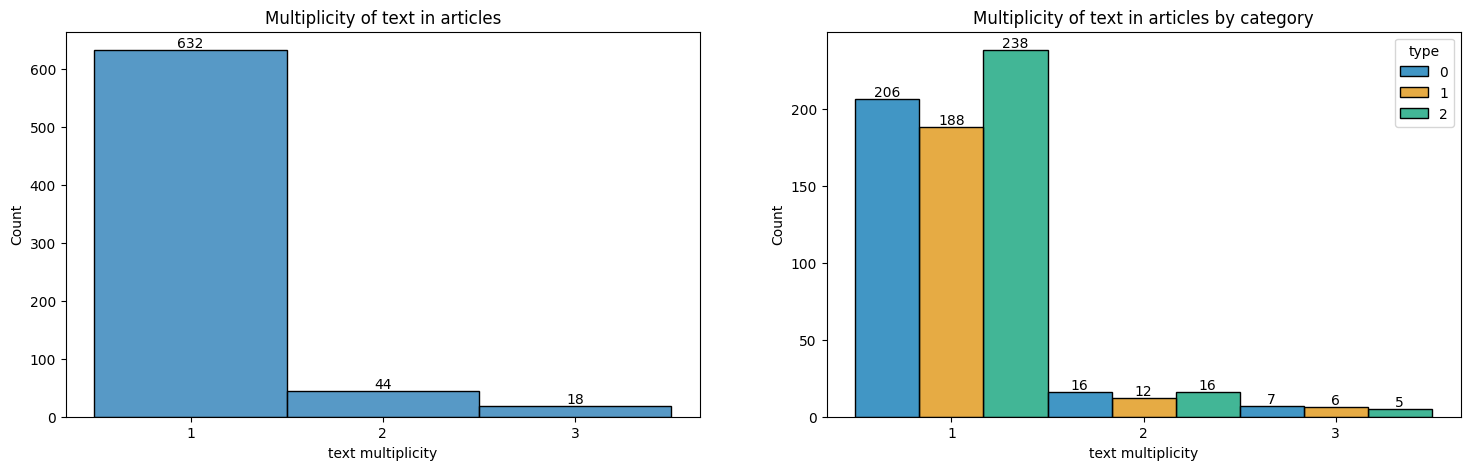

In [ ]:
df2['text multiplicity'] = df.groupby('kalimat')['kalimat'].transform('count').astype(str)

print('What categories contain most of the repeated Text?')
fig, ax = plt.subplots(ncols=2,figsize=(18, 5))
# Histogram showing repeated text multiplicity in training dataframe
ax2 = sns.histplot(
    ax = ax[0],
    data = df2,
    x='text multiplicity',
    palette = 'colorblind',
    multiple = 'dodge',
    legend = True,
    ).set(
        title = 'Multiplicity of text in articles');
add_histogram_values(ax[0])
# Same histogram, by Category
ax2 = sns.histplot(
    ax = ax[1],
    data = df2,
    x='text multiplicity',
    hue = 'type',
    palette = 'colorblind',
    multiple = 'dodge',
    legend = True,
    ).set(
        title = 'Multiplicity of text in articles by category');
add_histogram_values(ax[1])

Number of articles per topic (without duplicates):


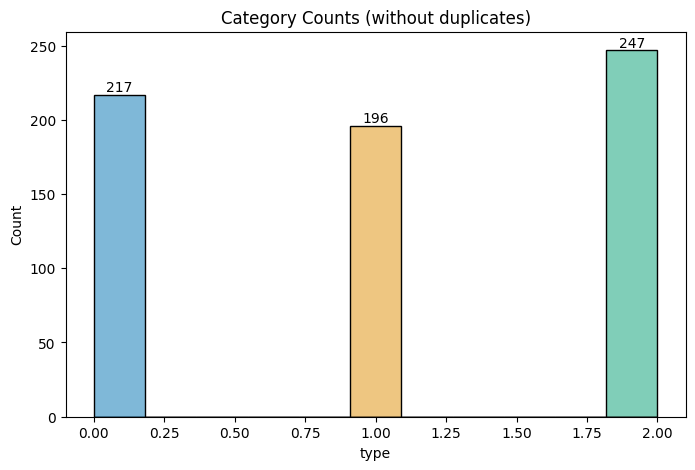

In [ ]:
df2 = df2.drop_duplicates(subset=['kalimat'])
print('Number of articles per topic (without duplicates):')
fig, ax = plt.subplots(figsize=(8, 5))
ax2 = sns.histplot(
    data = df2,
    x = 'type',
    hue = 'type',
    palette = 'colorblind',
    legend = False,
    ).set(
        title = 'Category Counts (without duplicates)');
add_histogram_values(ax)

<Axes: >

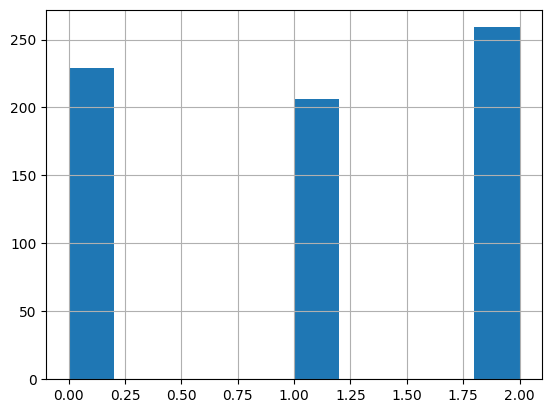

In [ ]:
df['type'].hist()

#Cleaning

In [ ]:
STOPWORD = set(stopwords.words('indonesian'))


 #remove special character n symbol
special_character_remover = re.compile('[/(){}\[\]\|@,;]')
extra_symbol_remover = re.compile('[^0-9a-z #+_]')
def clean_text(text):
    text = text.lower()
    text = special_character_remover.sub(' ', text)
    text = extra_symbol_remover.sub('', text)
    print(text)
    text = ' '.join(word for word in text.split() if word not in STOPWORD)

    return text
df['kalimat'] = df['kalimat'].apply(clean_text)


menemukan sesuatu untuk ditonton jika saya bosan
saya merasa kesulitan menulis suatu karya ilmiah tetapi saya pandai berpidato
menggerakkan bibir dan mengucapkan tulisan di buku saat membaca
berkomunikasi dengan menyentuh dan menghargai dorongan yang diungkapkan secara fisik  seperti tepukan
rangkullah pendekatan holistik daripada reduksionis  berusaha memahami seluruh konteks dan hubungan dalam topik
menyenangi tempat yang sunyi dan tenang untuk belajar
saat saya berupaya memecahkan masalah  saya membuat model dari masalah tersebut atau menjalani semua langkah dalam pikiran saya
memperluas catatan saya dengan berbicara dengan orang lain  dan mengumpulkan catatan dari materi
ketika saya mengajari seseorang hal yang baru  saya cenderung menulis instruksi untuk dia
jika saya menjelaskan kepada seseorang  saya cenderung menunjukkan kepada mereka apa yang saya maksud
saat saya berupaya memecahkan masalah  saya lebih suka untuk melakukan beberapa panggilan telepon dan berbicara dengan teman

#SPLIT TRAIN TEST

In [ ]:
df2=df

In [ ]:
df2=df[:20]
df=df[20:]
split_point=int(abs(len(df)*0.95))
train_data=df[:split_point]
test_data=df[split_point:]
test2_data=df2
print(train_data.shape)
print(test_data.shape)
print(test2_data.shape)

(640, 3)
(34, 3)
(20, 3)


In [ ]:
df[:0]

,type,kalimat,text multiplicity


In [ ]:
y_train = train_data["type"]
X_train = train_data["kalimat"]
X_test = test_data["kalimat"]
y_test = test_data["type"]
X_test2= test2_data["kalimat"]
y_test2 = test2_data["type"]

In [ ]:
y_train.shape

(640,)

In [ ]:
X_test.shape

(34,)

In [ ]:
train_sentences = X_train.to_numpy()
train_labels = y_train.to_numpy()
val_sentences = X_test.to_numpy()
val_labels = y_test.to_numpy()
test_sentences=X_test2.to_numpy()
test_labels=y_test2.to_numpy()

#tokenizing, padding

In [ ]:
type(train_sentences)

numpy.ndarray

In [ ]:
x=(df['kalimat'].apply(lambda x: len(x.split(' '))).sum())

In [ ]:
x

3417

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(train_sentences) # fit only to training

In [ ]:
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)
test_sequences=tokenizer.texts_to_sequences(test_sentences)
word_index

{'belajar': 1,
 'membaca': 2,
 'mendengarkan': 3,
 'suka': 4,
 'informasi': 5,
 'orang': 6,
 'cenderung': 7,
 'senang': 8,
 'berbicara': 9,
 'mudah': 10,
 'catatan': 11,
 'visual': 12,
 'materi': 13,
 'gambar': 14,
 'pemahaman': 15,
 'katakata': 16,
 'penjelasan': 17,
 'nyaman': 18,
 'suara': 19,
 'langsung': 20,
 'buku': 21,
 'teman': 22,
 'mencoba': 23,
 'petunjuk': 24,
 'kegiatan': 25,
 'menulis': 26,
 'lakukan': 27,
 'memilih': 28,
 'makanan': 29,
 'kelas': 30,
 'musik': 31,
 'berkonsentrasi': 32,
 'mendengar': 33,
 'mempelajari': 34,
 'seni': 35,
 'pelajaran': 36,
 'menyukai': 37,
 'bergerak': 38,
 'duduk': 39,
 'konsep': 40,
 'ujian': 41,
 'diskusi': 42,
 'diagram': 43,
 'tertulis': 44,
 'menu': 45,
 'mengikuti': 46,
 'menghafal': 47,
 'memperkuat': 48,
 'alat': 49,
 'membantu': 50,
 'halhal': 51,
 'tangan': 52,
 'membayangkan': 53,
 'mengerti': 54,
 'kepala': 55,
 'luang': 56,
 'band': 57,
 'ingatan': 58,
 'memahami': 59,
 'gerakan': 60,
 'berbeda': 61,
 'memiliki': 62,
 'terbai

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in a sequence
max_length = 15

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding="post", truncating="post")
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding="post", truncating="post")

train_padded.shape, val_padded.shape, test_padded.shape

((640, 15), (34, 15), (20, 15))

In [ ]:
train_padded[10]

array([28, 29, 45,  7, 53, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

In [ ]:
reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])

#one-hot encoding


In [ ]:
train_labels=tf.one_hot(
    train_labels,3)

In [ ]:
val_labels=tf.one_hot(
    val_labels,3)

In [ ]:
test_labels=tf.one_hot(
    test_labels,3)

#layer model

In [ ]:
from tensorflow.keras import layers

# Embedding: https://www.tensorflow.org/tutorials/text/word_embeddings
# Turns positive integers (indexes) into dense vectors of fixed size. (other approach could be one-hot-encoding)

# Word embeddings give us a way to use an efficient, dense representation in which similar words have
# a similar encoding. Importantly, you do not have to specify this encoding by hand. An embedding is a
# dense vector of floating point values (the length of the vector is a parameter you specify).

model = keras.models.Sequential()

model.add(layers.Embedding(3417, 15, input_length=15))
model.add(layers.LSTM(8, dropout=0.7))
model.add(layers.Dense(3, activation="Softmax"))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 15)            51255     
                                                                 
 lstm (LSTM)                 (None, 8)                 768       
                                                                 
 dense (Dense)               (None, 3)                 27        
                                                                 
Total params: 52,050
Trainable params: 52,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss = keras.losses.CategoricalCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

#Hasil

In [ ]:
history=model.fit(train_padded, train_labels, epochs=40, validation_data=(val_padded, val_labels), verbose=2)

Epoch 1/40
20/20 - 3s - loss: 1.0982 - accuracy: 0.3688 - val_loss: 1.0997 - val_accuracy: 0.2941 - 3s/epoch - 145ms/step
Epoch 2/40
20/20 - 0s - loss: 1.0947 - accuracy: 0.3797 - val_loss: 1.1010 - val_accuracy: 0.2941 - 157ms/epoch - 8ms/step
Epoch 3/40
20/20 - 0s - loss: 1.0921 - accuracy: 0.3797 - val_loss: 1.1008 - val_accuracy: 0.2941 - 188ms/epoch - 9ms/step
Epoch 4/40
20/20 - 0s - loss: 1.0907 - accuracy: 0.3797 - val_loss: 1.0987 - val_accuracy: 0.2941 - 143ms/epoch - 7ms/step
Epoch 5/40
20/20 - 0s - loss: 1.0821 - accuracy: 0.3797 - val_loss: 1.0885 - val_accuracy: 0.2941 - 149ms/epoch - 7ms/step
Epoch 6/40
20/20 - 0s - loss: 1.0508 - accuracy: 0.4156 - val_loss: 1.0254 - val_accuracy: 0.4118 - 131ms/epoch - 7ms/step
Epoch 7/40
20/20 - 0s - loss: 0.9359 - accuracy: 0.5781 - val_loss: 0.9215 - val_accuracy: 0.5588 - 141ms/epoch - 7ms/step
Epoch 8/40
20/20 - 0s - loss: 0.8273 - accuracy: 0.6156 - val_loss: 0.9474 - val_accuracy: 0.5000 - 166ms/epoch - 8ms/step
Epoch 9/40
20/20 

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

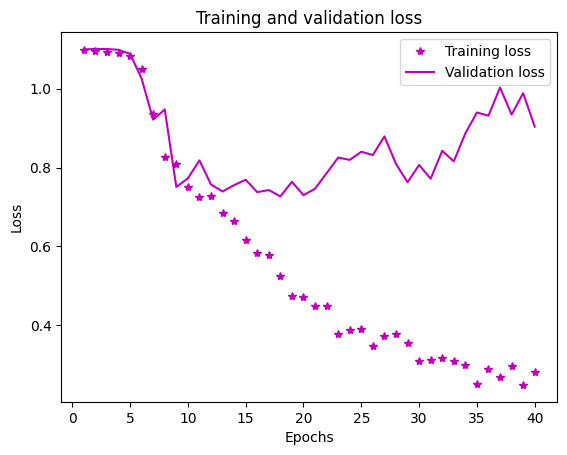

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


# "bo" is for "blue dot"
plt.plot(epochs, loss, 'm*', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'm', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

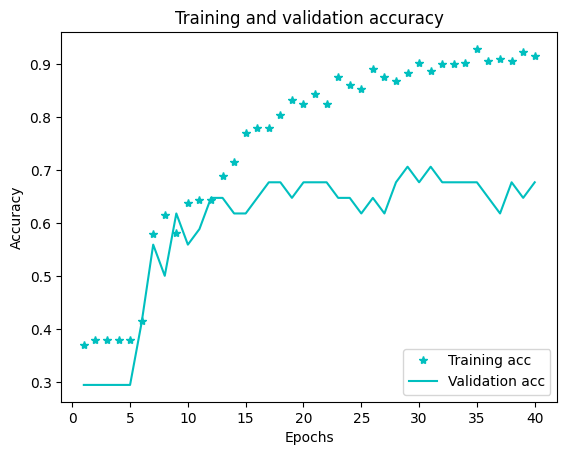

In [ ]:
plt.plot(epochs, acc, 'c*', label='Training acc')
plt.plot(epochs, val_acc, 'c', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [ ]:
model.predict(test_padded)
loss, accuracy=model.evaluate(test_padded, test_labels)
print("accuracy:",accuracy)
print("loss:",loss)

1/1 [==============================] - 0s 26ms/step - loss: 1.3550 - accuracy: 0.6500
accuracy: 0.6499999761581421
loss: 1.3550106287002563


In [ ]:
#

#Exports

##JSON

In [ ]:
vocab={}
for word, index in tokenizer.word_index.items():
  if index<=1000:
    vocab[word]=index

In [ ]:
import json

In [ ]:
with open('tokenizer.dictionary.json','w') as file:
  json.dump(vocab,file)

In [ ]:
pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 94.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [ ]:
import tensorflowjs as tfjs
import tensorflow as tf

model = tf.keras.models.load_model('model')

tfjs.converters.save_keras_model(model, 'Model_js')

##PHYTON

In [ ]:
model.save('my_model.h5')

In [ ]:
import pickle

with open('tokenizer_dictionary.pkl', 'wb') as file:

    # A new file will be created
    pickle.dump(tokenizer, file)

In [ ]:

with open('tokenizer_dictionary.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Pakai tokenizernya
input_text = "saya mau makan"
tokenized_input = tokenizer(input_text)

TypeError: ignored

In [ ]:
!zip -r /content/Model_js.zip /content/Model_js

  adding: content/Model_js/ (stored 0%)
  adding: content/Model_js/group1-shard1of1.bin (deflated 8%)
  adding: content/Model_js/model.json (deflated 70%)


In [ ]:
from google.colab import files
files.download("/content/Model_js.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Ini contoh kalau kalian mau pisah tokenizernya


# Save tokenizer data
import pickle
tokenizer.save('tokenizer.pkl')


# Load Tokenizer
import pickle
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Pakai tokenizernya
input_text = "Your input text"
tokenized_input = tokenizer(input_text)

In [ ]:
with open('tokenizer_dictionary.pkl', 'rb') as f:
    tokenizer = pickle.load(f)
from keras.models import load_model
model = load_model('my_model.h5')
import numpy as np
import re

def predict_text(req: RequestText, response: Response):
    try:
        # In here you will get text sent by the user
        text = req.text
        print("Uploaded text:", text)

        # Step 1: (Optional) Do your text preprocessing
        special_character_remover = re.compile('[/(){}\[\]\|@,;]')
        extra_symbol_remover = re.compile('[^0-9a-z #+_]')
        def clean_text(text):
          text = text.lower()
          text = special_character_remover.sub(' ', text)
          text = extra_symbol_remover.sub('', text)
          text = ' '.join(word for word in text.split())
        # Step 2: Prepare your data to your model
        tokenized_input = tokenizer(text)
        input_padded = pad_sequences(tokenized_input, maxlen=15, padding="post", truncating="post")
        # Step 3: Predict the data
        # result = model.predict(...)
        predicted=model.predict(input_padded)
        # Step 4: Change the result your determined API output
        class_predicted=np.argmax(predicted)
        return "Endpoint not implemented"
    except Exception as e:
        traceback.print_exc()
        response.status_code = 500
        return "Internal Server Error"